In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install segmentation-models-pytorch
!pip install rasterio
!pip install richdem

     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 376 kB 34.6 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=b8342c5b4eec7672d5038c21ef7d3dcf067645e06b22c385fedff0aae95856bf
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=74347bd0ba17c496725ca56ec4e4d0dda2884f5f74a87fab036067389fba7fbf
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
     |████████████████████████████████| 4.5 MB 5.1 MB/s 


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from pathlib import Path
import shutil
import pandas as pd  
import richdem as rd

In [6]:
# Root Directory
Image_Segmentation_Path = '/content/drive/My Drive/Image Segmentation/'

# Inputs/Sources

dataframes_path = Image_Segmentation_Path + "DataFrames/"

dataset_dirs_path = dataframes_path + 'three_channel_dataset.csv'



In [7]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset
from torch import FloatTensor

In [10]:
class Dataset(BaseDataset):    
    CLASSES = ['non-mound', 'mound']
    
    def __init__(
          self, 
          dirs):
        self.df = pd.read_csv(dirs)
        self.ids = self.df.index.to_list()

        # convert str names to class values on masks
        self.class_values = CLASSES = [0, 1]
    
    def __getitem__(self, i):
        # read data
        if self.df.at[i, 'origin'][-3:] == 'tif':
            with rasterio.open(self.df.at[i, 'origin']) as dem:
                dem_array = dem.read(1)

            with rasterio.open(self.df.at[i, 'hillshade']) as hillshade:
                hillshade_array = hillshade.read(1)

            with rasterio.open(self.df.at[i, 'slope']) as slope:
                slope_array = slope.read(1)

            with rasterio.open(self.df.at[i, 'mask']) as mask:
                mask_array = mask.read(1)
            mask_array = np.where(mask_array == 0.5, 0, mask_array)                        
        return dem_array, hillshade_array, slope_array, mask_array
      
    def __len__(self):
        return len(self.ids)

In [11]:
df = pd.read_csv(dataset_dirs_path)

In [12]:
df

,Unnamed: 0,hillshade,slope,origin,mask
0,0,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
1,1,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
2,2,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
3,3,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
4,4,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
...,...,...,...,...,...
2723,2723,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
2724,2724,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
2725,2725,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...
2726,2726,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...,/content/drive/My Drive/Image Segmentation/Res...


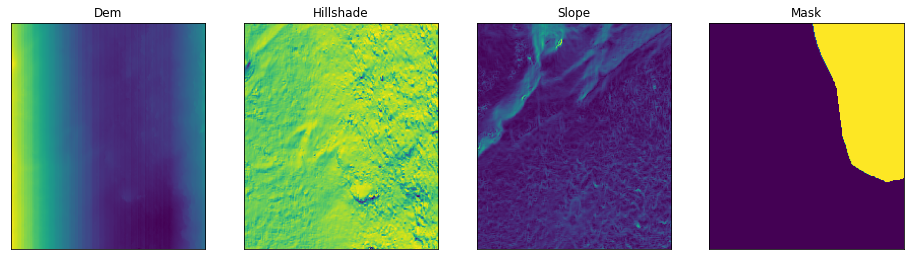

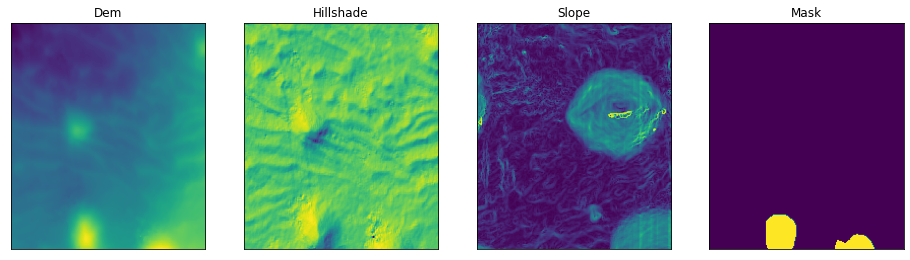

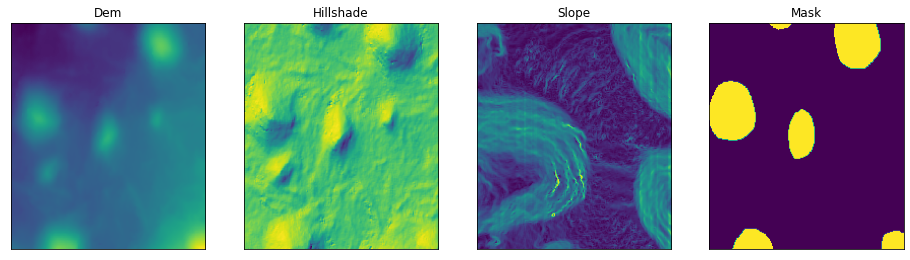

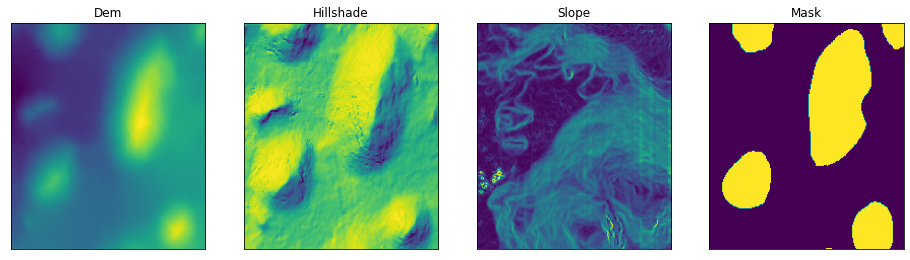

In [ ]:
idx = [303, 478, 479, 450]
for i in idx:
    dataset = Dataset(dataset_dirs_path)
    dem_array, hillshade_array, slope_array, mask_array = dataset[i]
    visualize(
        dem=dem_array,
        hillshade=hillshade_array,
        slope=slope_array,
        mask=mask_array,
    )

In [ ]:
dataset = Dataset(dataset_dirs_path)
for i in range(len(dataset)):
  print(i)
  dem_array, hillshade_array, slope_array, mask_array = dataset[i]
  # visualize(
  #     dem=dem_array,
  #     hillshade=hillshade_array,
  #     slope=slope_array,
  #     mask=mask_array,
  # )